In [1]:
pip install pandas numpy matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
df = pd.read_csv(r"D:\downloads\Banglore_traffic_Dataset.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                8936 non-null   object 
 1   Area Name                           8936 non-null   object 
 2   Road/Intersection Name              8936 non-null   object 
 3   Traffic Volume                      8936 non-null   int64  
 4   Average Speed                       8936 non-null   float64
 5   Travel Time Index                   8936 non-null   float64
 6   Congestion Level                    8936 non-null   float64
 7   Road Capacity Utilization           8936 non-null   float64
 8   Incident Reports                    8936 non-null   int64  
 9   Environmental Impact                8936 non-null   float64
 10  Public Transport Usage              8936 non-null   float64
 11  Traffic Signal Compliance           8936 no

In [3]:
# Numeric columns
numeric_cols = ['Traffic Volume','Average Speed','Travel Time Index',
                'Congestion Level','Road Capacity Utilization','Environmental Impact']

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Categorical columns
df['Area Name'] = df['Area Name'].fillna(df['Area Name'].mode()[0])
df['Road/Intersection Name'] = df['Road/Intersection Name'].fillna(df['Road/Intersection Name'].mode()[0])
df['Incident Reports'] = df['Incident Reports'].fillna(0)


In [4]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract hour and day of week for analysis
df['Hour'] = df['Date'].dt.hour
df['DayOfWeek'] = df['Date'].dt.dayofweek  # 0=Monday, 6=Sunday

# Quick check
df[['Date', 'Hour', 'DayOfWeek']].head()


,Date,Hour,DayOfWeek
0,2022-01-01,0,5
1,2022-01-01,0,5
2,2022-01-01,0,5
3,2022-01-01,0,5
4,2022-01-01,0,5


In [5]:
# 1. Congestion Severity: High / Medium / Low based on Congestion Level
def congestion_severity(x):
    if x > 0.75:
        return 'High'
    elif x > 0.5:
        return 'Medium'
    else:
        return 'Low'

df['Congestion Severity'] = df['Congestion Level'].apply(congestion_severity)

# 2. Traffic Efficiency: Average Speed / Road Capacity Utilization
df['Traffic Efficiency'] = df['Average Speed'] / df['Road Capacity Utilization']

# Quick check
df[['Congestion Level','Congestion Severity','Traffic Efficiency']].head()


,Congestion Level,Congestion Severity,Traffic Efficiency
0,100.000000,High,0.502303
1,100.000000,High,0.293771
2,28.347994,High,1.496692
3,100.000000,High,0.438176
4,100.000000,High,0.411168


In [6]:
# Numeric columns
numeric_cols = ['Traffic Volume','Average Speed','Travel Time Index',
                'Congestion Level','Road Capacity Utilization','Environmental Impact']

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Categorical columns
df['Area Name'] = df['Area Name'].fillna(df['Area Name'].mode()[0])
df['Road/Intersection Name'] = df['Road/Intersection Name'].fillna(df['Road/Intersection Name'].mode()[0])
df['Incident Reports'] = df['Incident Reports'].fillna(0)

# Confirm no missing values
df.isnull().sum()


Date                                  0
Area Name                             0
Road/Intersection Name                0
Traffic Volume                        0
Average Speed                         0
Travel Time Index                     0
Congestion Level                      0
Road Capacity Utilization             0
Incident Reports                      0
Environmental Impact                  0
Public Transport Usage                0
Traffic Signal Compliance             0
Parking Usage                         0
Pedestrian and Cyclist Count          0
Weather Conditions                    0
Roadwork and Construction Activity    0
Hour                                  0
DayOfWeek                             0
Congestion Severity                   0
Traffic Efficiency                    0
dtype: int64

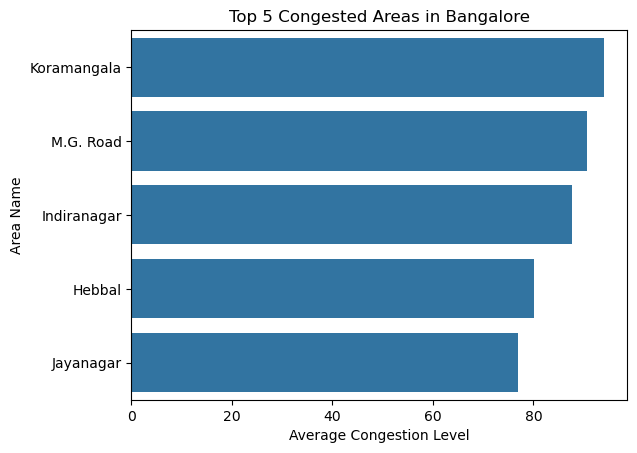

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

top5 = df.groupby('Area Name')['Congestion Level'].mean().sort_values(ascending=False).head(5)
sns.barplot(x=top5.values, y=top5.index)
plt.title("Top 5 Congested Areas in Bangalore")
plt.xlabel("Average Congestion Level")
plt.show()


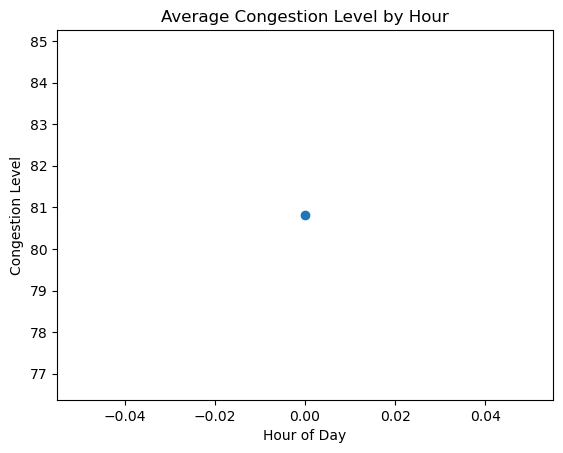

In [8]:
hourly = df.groupby('Hour')['Congestion Level'].mean()
hourly.plot(kind='line', marker='o')
plt.title("Average Congestion Level by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Congestion Level")
plt.show()


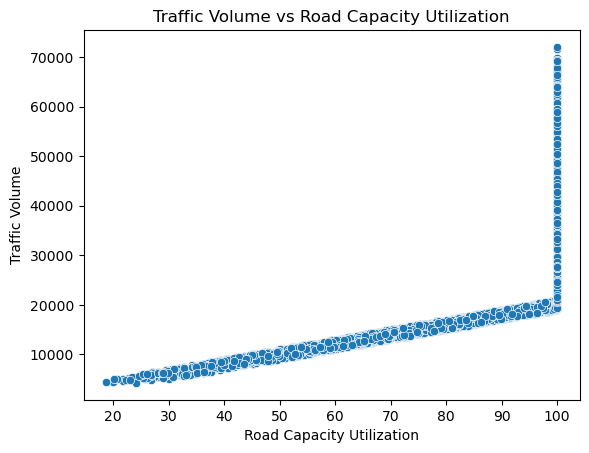

In [9]:
sns.scatterplot(x='Road Capacity Utilization', y='Traffic Volume', data=df)
plt.title("Traffic Volume vs Road Capacity Utilization")
plt.show()


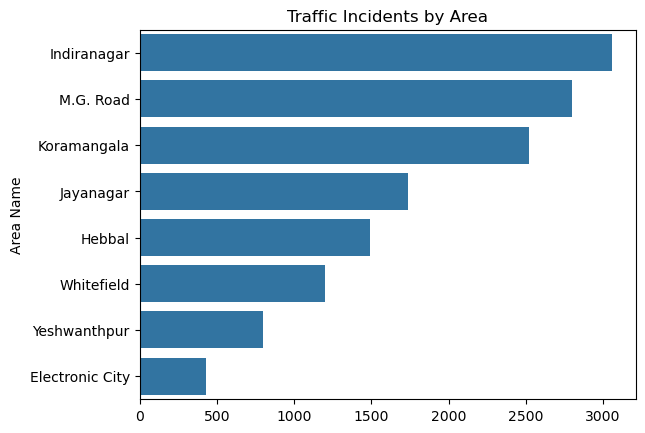

In [10]:
incident_data = df.groupby('Area Name')['Incident Reports'].sum().sort_values(ascending=False)
sns.barplot(x=incident_data.values, y=incident_data.index)
plt.title("Traffic Incidents by Area")
plt.show()


In [11]:
!pip install prophet

16:54:26 - cmdstanpy - INFO - Chain [1] start processing
16:54:27 - cmdstanpy - INFO - Chain [1] done processing


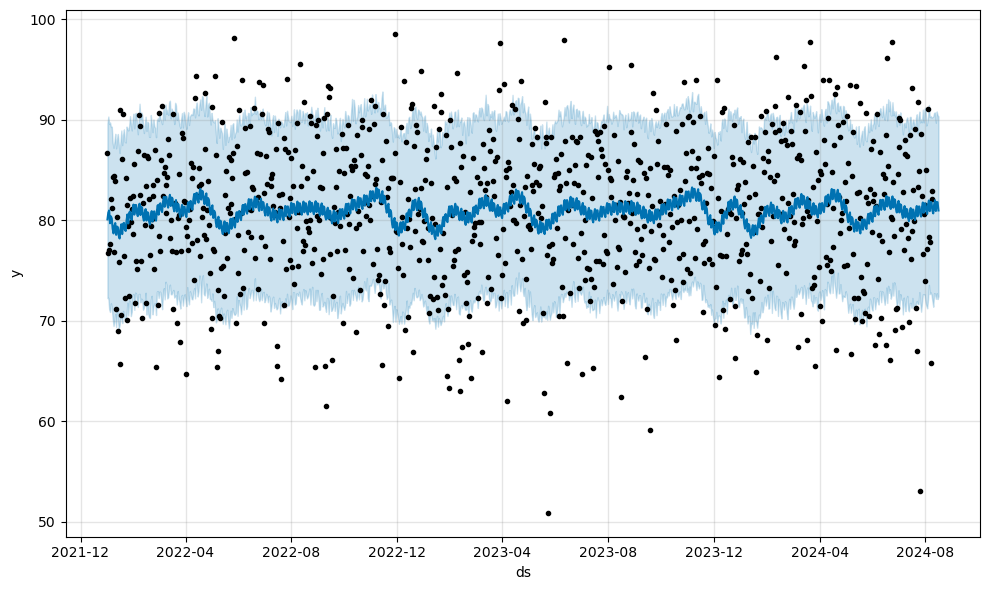

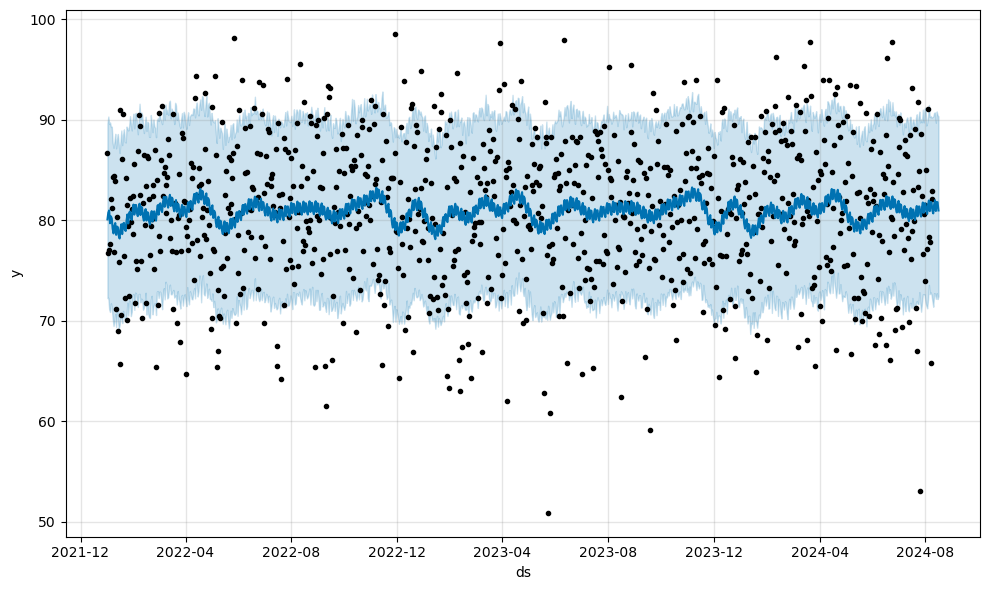

In [12]:
from prophet import Prophet

df_prophet = df.groupby('Date')['Congestion Level'].mean().reset_index()
df_prophet = df_prophet.rename(columns={'Date':'ds','Congestion Level':'y'})

model = Prophet()
model.fit(df_prophet)
future = model.make_future_dataframe(periods=7)  # Next 7 days
forecast = model.predict(future)

model.plot(forecast)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Encode categorical areas
df_encoded = pd.get_dummies(df, columns=['Area Name'])

X = df_encoded[['Hour','DayOfWeek','Traffic Volume'] + [col for col in df_encoded.columns if 'Area Name_' in col]]
y = df_encoded['Congestion Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 22.32985399858265


In [14]:
!pip install folium

In [15]:
pip install streamlit folium streamlit-folium


Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install branca


Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px


In [18]:
top5 = df.groupby('Area Name')['Congestion Level'].mean().sort_values(ascending=False).head(5)
fig = px.bar(top5, x=top5.values, y=top5.index, orientation='h', 
             title="Top 5 Congested Areas in Bangalore", 
             labels={'x':'Average Congestion Level','y':'Area Name'}, 
             color=top5.values, color_continuous_scale='Reds')
fig.show()


In [19]:
hourly = df.groupby('Hour')['Congestion Level'].mean()
fig = px.line(hourly, x=hourly.index, y=hourly.values, markers=True,
              title="Average Congestion Level by Hour", 
              labels={'x':'Hour of Day','y':'Congestion Level'})
fig.show()


In [20]:
# Add Lat/Lon for simplicity (center of Bangalore)
df['Lat'] = 12.9716
df['Lon'] = 77.5946

m = folium.Map(location=[12.9716, 77.5946], zoom_start=12)
heat_data = [[row['Lat'], row['Lon'], row['Congestion Level']] for index, row in df.iterrows()]
HeatMap(heat_data, radius=15).add_to(m)
m  # This will display inline in Jupyter


In [21]:
incident_area = df.groupby('Area Name')['Incident Reports'].sum().sort_values(ascending=False)
fig = px.bar(incident_area, x=incident_area.values, y=incident_area.index, orientation='h',
             title="Traffic Incidents by Area", 
             labels={'x':'Total Incidents','y':'Area Name'}, 
             color=incident_area.values, color_continuous_scale='Oranges')
fig.show()
